### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Friday, Feb 12th at 11.59pm CST
---

In [71]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson
plt.rcParams["figure.figsize"] = (15,8)

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between -$\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

# 1)

Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between -$\infty$ and $+\infty$

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

Now set $\mu=0$

$$p(x|\mu=0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right).$$

What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$?

$$p(x|\mu=0,\sigma) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right).$$

# 2)

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution.

$$ \frac{\sigma\sqrt{2\pi}}{2} \int_0^\infty x^3  \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

$$ \int_0^\infty x^3  \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \frac{4 \sigma^3}{\sqrt{2\pi}}$$

# 3)

Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation.

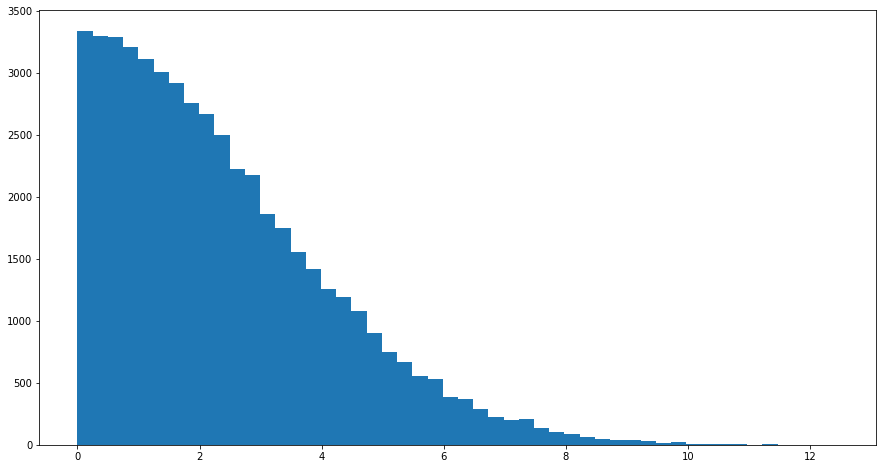

In [15]:
mu=0
sigma=3
N=10**5
samples=np.random.normal(loc=mu,scale=sigma,size=N) #draw samples
mask=np.where(samples>0) # mask those samples > 0

_,_,_=plt.hist(samples[mask],bins=50)

For Monte Carlo integration

$$ \int_\Omega h(x)f(x)dx \approx \frac{1}{N} \sum_{i=1}^N h(x_i) $$

Where $x_i$ drawn iid from $f(x)$

In our case $h(x)$ is $x^3$, $f(x)$ is our normalized half gaussian distribution, and $h(x_i)$ is taking the cube of a given draw from samples[mask]

NOTE: In this case, N is not $10^5$, instead N is len(samples[mask]) (about $0.5*10^5$)

In [19]:
num_integral=0
for i in samples[mask]:
    num_integral+=i**3
num_integral*=(1/len(samples[mask]))

true_integral=4*sigma**3/(np.sqrt(2*np.pi))

print("Monte Carlo Integration Value for N=10^5: {:.2f}".format(num_integral))
print("True Integration Value: {:.2f}".format(true_integral))

Monte Carlo Integration Value for N=10^5: 44.09
True Integration Value: 43.09


SRT: Not the most pythonic way to get to the solution. "For" loops are slow in general, and you can do the MC integral with np.sum on function evaluated at the masked samples, or even better np.mean. 

# 4)

Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

In [22]:
Ns=[10**2,10**3,10**4,10**5]
num_batches=100

calculated_num_integrals=[[],[],[],[]] #list of lists, each entry will be a list of all of the batch values
# for a given N

for i in range(len(Ns)):
    for batch in range(num_batches):
        samples=np.random.normal(loc=mu,scale=sigma,size=Ns[i]) #draw samples
        mask=np.where(samples>0) # mask those samples > 0
    
        num_integral=0
        for j in samples[mask]:
            num_integral+=j**3
        num_integral*=(1/len(samples[mask]))
        calculated_num_integrals[i].append(num_integral)

# 5)

Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. Plot a horizontal line on the same figure to show the precise mathematical value.

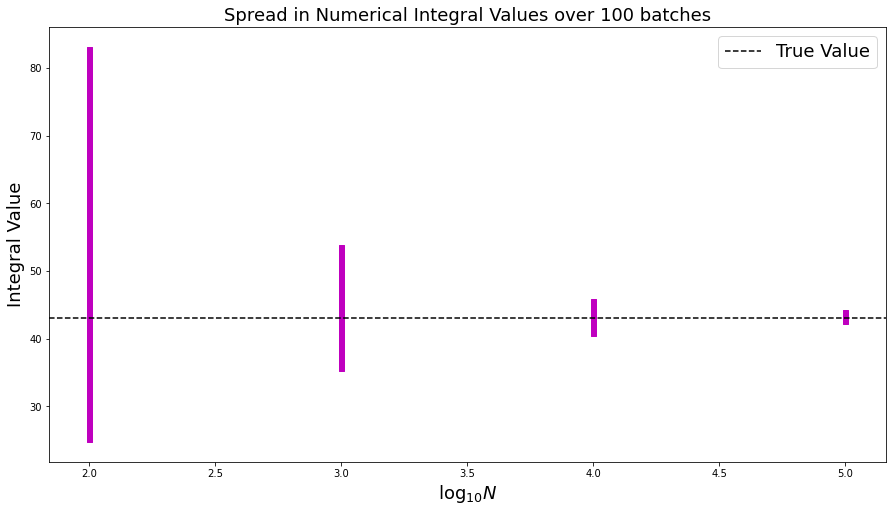

In [34]:
for i in range(len(Ns)):
    
    min_value=min(calculated_num_integrals[i])
    max_value=max(calculated_num_integrals[i])
    
    plt.fill_between([np.log10(Ns[i])-0.01,np.log10(Ns[i])+0.01],y1=max_value,y2=min_value,color='m')
plt.axhline(true_integral,c='k',ls='--',label='True Value')

plt.xlabel(r'$\log_{10}N$',fontsize=18)
plt.ylabel('Integral Value',fontsize=18)
plt.title('Spread in Numerical Integral Values over 100 batches',fontsize=18)
plt.legend(loc='upper right',fontsize=18)
    

SRT: Minor plotting mishap. The answers are right of course, but the goal was to see a band of uncertainty getting smaller. Using fill_between for two curves that are the max and min values at each N would give you that.

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

# 1)

10 Random Draws from IQ distribution:
[106.53605996  83.28485926 111.29231348  94.17253318 112.45397494
  75.18898494 106.17644557 114.94584409  73.95138553  56.28357193]

IQ distribution pdf at 145: 0.00030


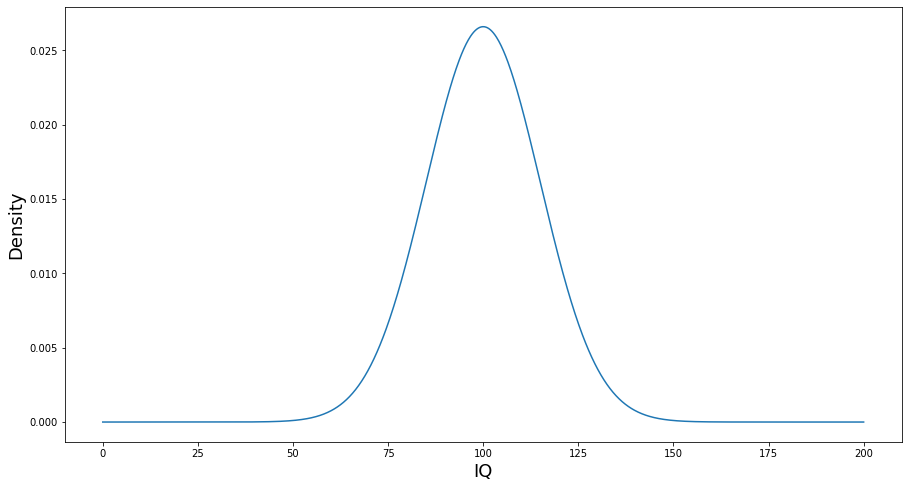

In [44]:
iq_dis=norm(loc=100,scale=15) #create gaussian object
index=np.linspace(0,200,1000)
plt.plot(index,iq_dis.pdf(index)) #plot the distribution
plt.xlabel('IQ',fontsize=18)
plt.ylabel('Density',fontsize=18)

print("10 Random Draws from IQ distribution:")
print(iq_dis.rvs(10)) #print 10 random draws
print("")
pdf_145=iq_dis.pdf(145)
print("IQ distribution pdf at 145: {:.5f}".format(pdf_145))

# 2) 

Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure.

Text(0, 0.5, 'Cumulative Distribution Function')

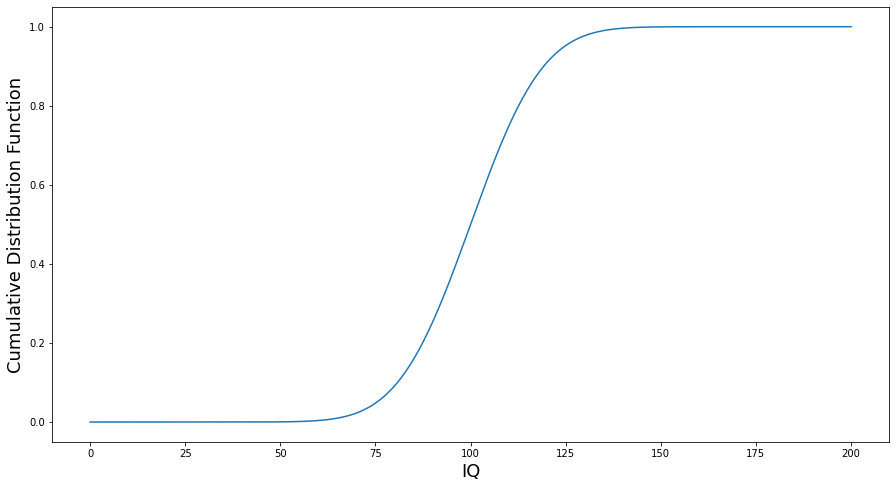

In [45]:
plt.plot(index,iq_dis.cdf(index))
plt.xlabel('IQ',fontsize=18)
plt.ylabel('Cumulative Distribution Function',fontsize=18)

Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

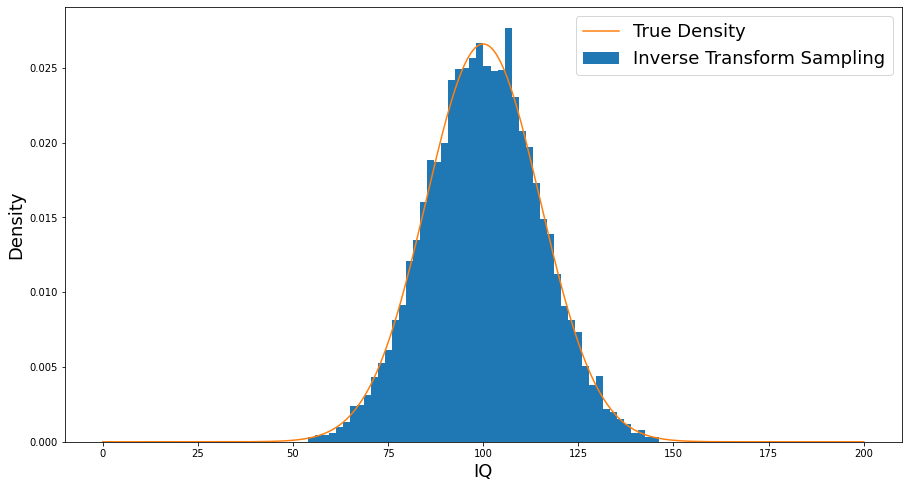

In [57]:
# generate a random sample u from uniform [0,1]
u = np.random.uniform(0.001, 0.999, 10**4)

# using the quantile function, find the value of x below which a fraction u of the distribution is contained
random_samples=iq_dis.ppf(u)

plt.hist(random_samples,bins=50,density=True,label='Inverse Transform Sampling')
plt.plot(index,iq_dis.pdf(index),label='True Density')
plt.xlabel('IQ',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.legend(loc='upper right',fontsize=18)

# 3)

What fraction of people have IQ > 145?

In [61]:
frac=iq_dis.cdf(145)

print("Percent of people with IQ>145: {:.4f}%".format((1-frac)*100))

Percent of people with IQ>145: 0.1350%


# 4)

What IQ corresponds to "one in a million"?

In [65]:
frac=1/1000000 #one in a million

high_iq=iq_dis.ppf(1-frac)

print("One in a million IQ: {:.1f}".format(high_iq))

One in a million IQ: 171.3


SRT: Great! Can also use the inverse survival function `isf`.

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

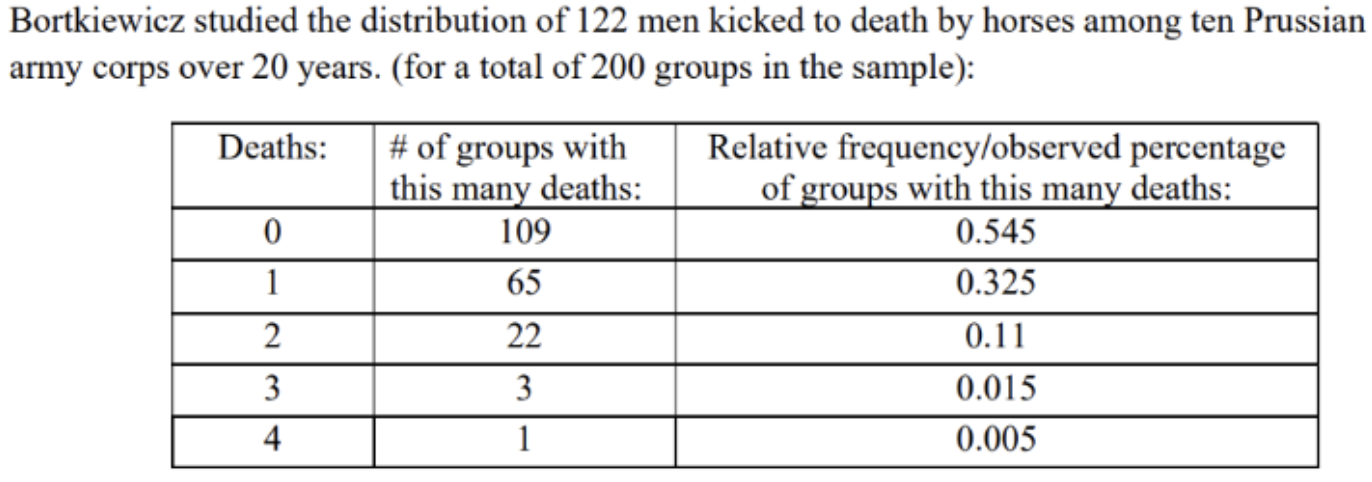

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

# 1) & 2)

Text(0, 0.5, 'Relative Frequency')

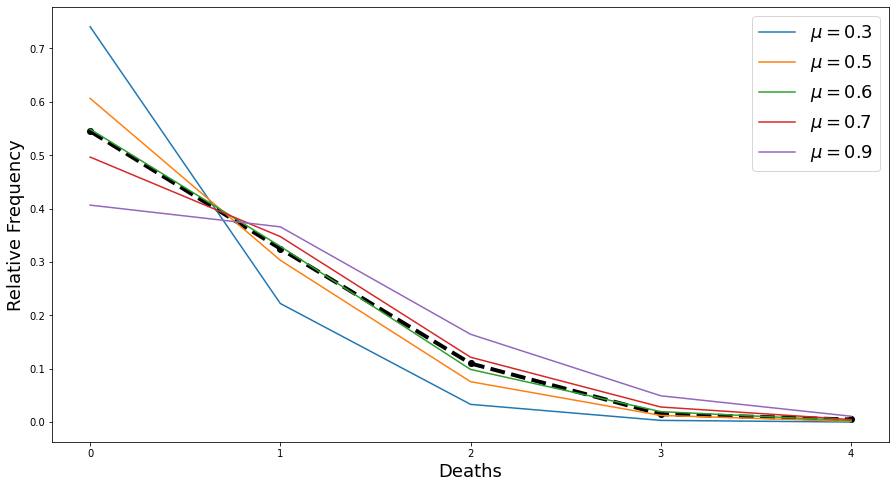

In [92]:
deaths=[0,1,2,3,4]
rel_freq=[0.545,0.325,0.11,0.015,0.005]

plt.plot(deaths,rel_freq,c='k',ls='--',lw=4)
plt.scatter(deaths,rel_freq,c='k')

mus=[0.3,0.5,0.6,0.7,0.9]
for mu in mus:
    plt.plot(index,poisson.pmf(deaths,mu),label=r'$\mu=$'+str(mu))

plt.legend(loc='upper right',fontsize=18)
plt.xticks(deaths)
plt.xlabel('Deaths',fontsize=18)
plt.ylabel('Relative Frequency',fontsize=18)

# 3)

use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant.

In [94]:
num_groups=[109,65,22,3,1]
weighted_mean=np.average(deaths,weights=num_groups)
# here's how np.average handles weights
# avg = sum(a * weights) / sum(weights)

print("Estimated mu from the weighted mean: {:.2f}".format(weighted_mean))

Estimated mu from the weighted mean: 0.61


# 4)

Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

Text(0, 0.5, 'Relative Frequency')

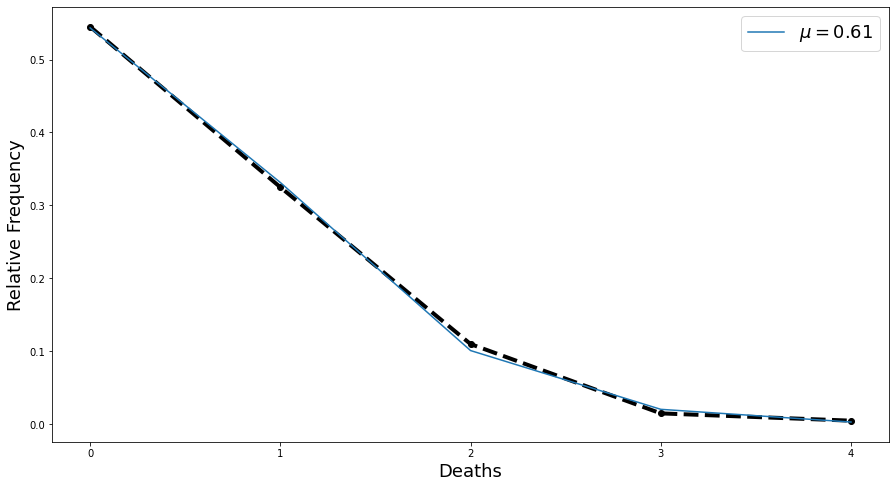

In [95]:
deaths=[0,1,2,3,4]
rel_freq=[0.545,0.325,0.11,0.015,0.005]

plt.plot(deaths,rel_freq,c='k',ls='--',lw=4)
plt.scatter(deaths,rel_freq,c='k')

mu=0.61
plt.plot(index,poisson.pmf(deaths,mu),label=r'$\mu=$'+str(mu))

plt.legend(loc='upper right',fontsize=18)
plt.xticks(deaths)
plt.xlabel('Deaths',fontsize=18)
plt.ylabel('Relative Frequency',fontsize=18)

SRT: Excellent!